## MTCNN model from the facenet-pytorch 


### Why FaceNet-PyTorch?

We can detect faces using two common methods, Harr cascades and deep learning. Harr cascades are fast but not very accurate, while deep learning models are more accurate but slower. FaceNet-PyTorch is a deep learning model that is both fast and accurate. It uses the MTCNN model to detect faces, draw bounding boxes, and landmarks.
example of haar cascades is openCV's `cv2.CascadeClassifier` which is a pre-trained model that can be used to detect faces in images. However, it is not as accurate as deep learning models.

FaceNet-PyTorch is a deep learning model that is both fast and accurate. It uses the MTCNN model to detect faces, draw bounding boxes, and landmarks.

FaceNet not only detect faces it also provides the coordinates for both the bounding boxes and the facial landmarks ( eyes, nose, mouth) which can be used for further analysis.

To detect faces, draw bounding boxes, and landmarks using FaceNet-PyTorch in PyTorch, you can use the MTCNN model from the facenet-pytorch library. The MTCNN model detects faces and provides the coordinates for both the bounding boxes and the facial landmarks.

FaceNet github: https://github.com/timesler/facenet-pytorch


In [1]:
!pip install facenet-pytorch
!pip install torchvision


   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.9 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/198.6 MB ? eta -:--:--
   ---------------------------------------- 0.8/198.6 MB 4.8 MB/s eta 0:00:42
   ---------------------------------------- 1.8/198.6 MB 5.6 MB/s eta 0:00:36
    --------------------------------------- 3.1/198.6 MB 5.8 MB/s eta 0:00:34
    --------------------------------------- 4.7/198.6 MB 6.1 MB/s eta 0:00:32
   - -------------------------------------- 5.8/198.6 MB 6.1 MB/s eta 0:00:32
   - -------------------------------------- 7.1/198.6 MB 6.0 MB/s eta 0:00:33
   - -------------------------------------- 8.7/198.6 MB 6.2 MB/s eta 0:00:31
   - -------------------------------------- 9.7/198.6 MB 6.0 MB/s eta 0:00:32
   -- ------------------------------------- 11.3/198.6 MB 6.2 MB/s eta 0:00:31
   --

Found 5 landmarks, Bounding box area: 24372.502015382983, ratio: 0.022567131495724983
Found 5 landmarks, Bounding box area: 207.37558781728148, ratio: 0.00019201443316414952
Skipping the box, area is too small
Found 5 landmarks, Bounding box area: 192.57995278574526, ratio: 0.00017831477109791228
Skipping the box, area is too small


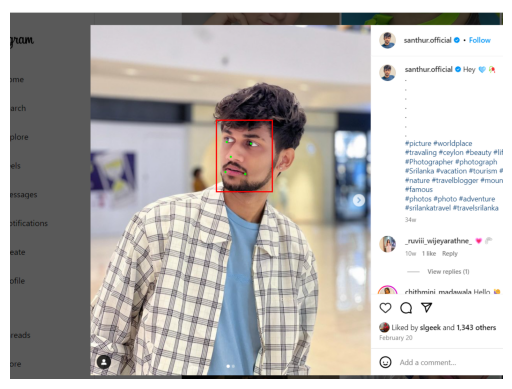

In [9]:
import torch
from facenet_pytorch import MTCNN
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Load an image using PIL or OpenCV
image_path = './data/2.png'
image = Image.open(image_path)

AREA_THRESHOLD = 0.005

# Initialize MTCNN
mtcnn = MTCNN(keep_all=True, device='cuda' if torch.cuda.is_available() else 'cpu')

# Detect faces, bounding boxes, and landmarks
boxes, probs, landmarks = mtcnn.detect(image, landmarks=True)

# Convert PIL image to draw the boxes and landmarks
draw = ImageDraw.Draw(image)

# image area 
image_area = image.size[0] * image.size[1]

# Draw the bounding boxes
if boxes is not None:
    for box, landmark in zip(boxes, landmarks):
        # Draw bounding box
        landmarks_count = len(landmark)
        
        bbox_area = (box[2] - box[0]) * (box[3] - box[1])
        bbox_area_ratio = bbox_area / image_area
        print(f'Found {landmarks_count} landmarks, Bounding box area: {bbox_area}, ratio: {bbox_area_ratio}')

        if bbox_area_ratio < AREA_THRESHOLD:
            print(f'Skipping the box, area is too small')
            continue

        draw.rectangle(box.tolist(), outline=(255, 0, 0), width=3)
        # Draw landmarks
        for point in landmark:
            draw.ellipse((point[0] - 2, point[1] - 2, point[0] + 2, point[1] + 2), fill=(0, 255, 0))

# Show the final image with boxes and landmarks
plt.imshow(image)
plt.axis('off')
plt.show()
